In [1]:
!pip install Catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [23]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4123    0  4123    0     0  11641      0 --:--:-- --:--:-- --:--:-- 11679
100  517k  100  517k    0     0   512k      0  0:00:01  0:00:01 --:--:-- 6286k
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.7 MB/s eta 0:00:00
--2025-01-22 07:38:22--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecb

In [24]:
!pip install PyPortfolioOpt

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [66]:
print("What is the period for which you are looking to invest\n")
print("1) 3 Months")
print("2) 1 Month")
print("3) 2 weeks")
print('4) 1 week')
start_date = "2000-01-01"
end_date = "2024-10-17"
end_date_test = "2024-11-17"



n = int(input("Enter a digit corresponding to your choice of Time Period: "))

if n==1:
    period = '3m'
elif n==2:
    period = '1m'
elif n==3:
    period = '2w'
elif n==4:
    period = '1w'
else:
    "Enter a valid input"


# if(period == '1y'):
#     tr_pct = 12.3
#     rr = 0.34
#     no_of_days = 252
#     rfr = 0.07
# elif(period =='6m'):
#     tr_pct = 6.1986
#     rr = 0.34
#     no_of_days = 126
#     rfr = 0.034408043278860045
if(period == '3m'):
    tr_pct = 3.0899
    rr = 0.34
    no_of_days = 63
    rfr = 0.017058525001811375
elif(period == '1m'):
    tr_pct = 1.0168
    rr = 0.34
    no_of_days = 21
    rfr = 0.005654145387405274
elif(period == '2w'):
    tr_pct = 0.488
    rr = 0.34
    no_of_days = 10
    rfr = 0.0022
elif(period == '1w'):
    tr_pct = 0.243
    rr = 0.34
    no_of_days = 5
    rfr = 0.0011

What is the period for which you are looking to invest

1) 3 Months
2) 1 Month
3) 2 weeks
4) 1 week
Enter a digit corresponding to your choice of Time Period: 2


In [67]:
def get_signal(ticker,tr_pct,rr,no_of_days):

    # Use the yfinance library to get the historical data
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['High','Low','Close','Volume']]
    df.dropna(how='any', inplace=True)
    adj=df['Close'].to_numpy().flatten().astype(np.float64)
    low=df['Low'].to_numpy().flatten().astype(np.float64)
    high=df['High'].to_numpy().flatten().astype(np.float64)
    vol=df['Volume'].to_numpy().flatten().astype(np.float64)

    # Calculate Simple Moving Average (SMA)
    df['SMA-21'] = talib.SMA(adj, timeperiod=21)
    df['SMA-55'] = talib.SMA(adj, timeperiod=55)
    df['SMA-100'] = talib.SMA(adj, timeperiod=100)
    df['SMA-200'] = talib.SMA(adj, timeperiod=200)

    #Calculate Chaikin A/D Oscillator
    df['ADOSC'] = talib.ADOSC(high, low, adj, vol, fastperiod=3, slowperiod=10)

    # Calculate Exponential Moving Average (EMA)
    df['EMA-12'] = talib.EMA(adj, timeperiod=12)
    df['EMA-26'] = talib.EMA(adj, timeperiod=26)
    df['EMA-50'] = talib.EMA(adj, timeperiod=50)
    df['EMA-200'] = talib.EMA(adj, timeperiod=200)

    # Calculate Relative Strength Index (RSI)
    df['RSI-5'] = talib.RSI(adj, timeperiod=5)
    df['RSI-14'] = talib.RSI(adj, timeperiod=14)

    # Calculate Moving Average Convergence Divergence (MACD)
    macd, signal, _ = talib.MACD(adj, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = _

    # Calculate Bollinger Bands
    upper, middle, lower = talib.BBANDS(adj, timeperiod=20, nbdevup=2, nbdevdn=2)
    df['BB_upper'] = upper
    df['BB_middle'] = middle
    df['BB_lower'] = lower

    df['BB_upper'] = (df['BB_upper'] - adj) / adj * 100
    df['BB_middle'] = (df['BB_middle'] - adj) / adj * 100
    df['BB_lower'] = (df['BB_lower'] - adj) / adj * 100

    df['ADX'] = talib.ADX(high, low, adj, timeperiod=14)
    df['ATR'] = talib.ATR(high, low, adj, timeperiod=14)

    #Calculate Chaikin A/D Oscillator
    df['ADOSC'] = talib.ADOSC(high, low, adj, vol, fastperiod=3, slowperiod=10)

    # Calculate Hilbert Transform - Dominant Cycle Period (HT_DCPERIOD)
    df['dc_period'] = talib.HT_DCPERIOD(adj)

    # Calculate Hilbert Transform - Dominant Cycle Phase (HT_DCPHASE)
    df['dc_phase'] = talib.HT_DCPHASE(adj)

    df['pct_change'] = df['Close'].pct_change(periods=no_of_days) * 100
    df['pct_change'] = df['pct_change'].shift(-no_of_days)

    columns_to_replace = ['SMA-21', 'SMA-55', 'SMA-100', 'SMA-200', 'EMA-12', 'EMA-26', 'EMA-50', 'EMA-200']

    # Iterate over the columns and replace the values based on 'Adj Close'
    for column in columns_to_replace:
        df[column] = ((adj - df[column]) / adj) * 100

    last_row = df.tail(1)

    df.dropna(how='any', inplace=True)

    # Create a new column based on the conditions
    df['Signal'] = 0
    df.loc[(df['pct_change'] >= tr_pct), 'Signal'] = 1
    df = df.drop(columns={'pct_change'})

    features = ['SMA-21', 'SMA-55', 'SMA-100', 'SMA-200', 'EMA-12', 'EMA-26', 'EMA-50',
                'EMA-200', 'RSI-5', 'RSI-14', 'MACD', 'BB_upper', 'BB_middle', 'BB_lower',
                'ADX','ATR','ADOSC','dc_period','dc_phase']

    target = 'Signal'

    X = df[features].values
    y = df[target].values

    # Preprocess the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    # Split the preprocessed data into training and testing sets
    # Splitting the data with the last 100 samples as the test set

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Define the base classifiers
    rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=500)
    gb = GradientBoostingClassifier(learning_rate=0.1)
    bc = BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=100)
    knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')

    lgb_params = {
        'objective': 'binary',  # Binary classification objective
        'verbose': 0
    }
    lgb_model = LGBMClassifier(**lgb_params,force_col_wise=True)

    # CatBoost binary classifier
    catboost_params = {
        'loss_function': 'Logloss',
        'verbose': 0            # Set verbose to 0 to avoid printing progress
    }
    catboost_model = CatBoostClassifier(**catboost_params)

    # Soft voting classifier
    voting_soft = VotingClassifier(
        estimators=[('rf', rf), ('gb', gb),('bc',bc),('knn', knn), ('lgb_model', lgb_model), ('catboost_model', catboost_model)],
        voting='soft'
    )



    # Fit the soft voting classifier on the oversampled training data
    voting_soft.fit(X_train, y_train)

    y_pred_soft = voting_soft.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_soft))
    print("Accuracy:", accuracy_score(y_test, y_pred_soft) * 100)
    print("Precision:", precision_score(y_test, y_pred_soft) * 100)

    # Extract features from the last row
    features_last_row = last_row[features]

    # Preprocess the features of the last row
    features_last_row = scaler.transform(features_last_row)

    # Make the prediction
    predicted_signal = voting_soft.predict(features_last_row)


    # Assign the predicted value to the 'Signal' column of the last row
    last_row.loc[:, 'Signal'] = predicted_signal

    if last_row.loc[:, 'Signal'].values[0] == 1:
        return run_classification(ticker,rr,no_of_days)

    # Return the predicted signal
    else:
        return last_row.loc[:, 'Signal'].values[0]

In [68]:
# import warnings
# # Ignore all warnings
# warnings.filterwarnings("ignore")

def run_classification(ticker,rr,no_of_days):

    # Download historical data for the ticker
    df = yf.download(ticker, start=start_date, end=end_date)
    df.dropna(how='any', inplace=True)
    df = df[['Open','High','Low','Close','Volume']]
    adj=df['Close'].to_numpy().flatten().astype(np.float64)
    low=df['Low'].to_numpy().flatten().astype(np.float64)
    high=df['High'].to_numpy().flatten().astype(np.float64)
    vol=df['Volume'].to_numpy().flatten().astype(np.float64)


    # Calculate Simple Moving Average (SMA)
    df['SMA-21'] = talib.SMA(adj, timeperiod=21)
    df['SMA-55'] = talib.SMA(adj, timeperiod=55)
    df['SMA-100'] = talib.SMA(adj, timeperiod=100)
    df['SMA-200'] = talib.SMA(adj, timeperiod=200)

    # Calculate Exponential Moving Average (EMA)
    df['EMA-12'] = talib.EMA(adj, timeperiod=12)
    df['EMA-26'] = talib.EMA(adj, timeperiod=26)
    df['EMA-50'] = talib.EMA(adj, timeperiod=50)
    df['EMA-200'] = talib.EMA(adj, timeperiod=200)

    # Calculate Relative Strength Index (RSI)
    df['RSI-5'] = talib.RSI(adj, timeperiod=5)
    df['RSI-14'] = talib.RSI(adj, timeperiod=14)

    # Calculate Moving Average Convergence Divergence (MACD)
    macd, signal, _ = talib.MACD(adj, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = _

    # Calculate Bollinger Bands
    upper, middle, lower = talib.BBANDS(adj, timeperiod=20, nbdevup=2, nbdevdn=2)
    df['BB_upper'] = upper
    df['BB_middle'] = middle
    df['BB_lower'] = lower

    df['BB_upper'] = (df['BB_upper'] - adj) / adj * 100
    df['BB_middle'] = (df['BB_middle'] - adj) / adj * 100
    df['BB_lower'] = (df['BB_lower'] - adj) / adj * 100

    df['ADX'] = talib.ADX(high, low, adj, timeperiod=14)
    df['ATR'] = talib.ATR(high, low, adj, timeperiod=14)

    df['ADOSC'] = talib.ADOSC(high, low, adj, vol, fastperiod=3, slowperiod=10)
    # Calculate Hilbert Transform - Dominant Cycle Period (HT_DCPERIOD)
    df['dc_period'] = talib.HT_DCPERIOD(adj)

    # Calculate Hilbert Transform - Dominant Cycle Phase (HT_DCPHASE)
    df['dc_phase'] = talib.HT_DCPHASE(adj)

    df['High'] = df['High'].rolling(no_of_days).max().shift(-no_of_days)
    df['Low'] = df['Low'].rolling(no_of_days).min().shift(-no_of_days)
    df['High'] = (df['High'] - df['Open'])/df['Open']
    df['Low'] = np.abs((df['Low'] - df['Open'])/df['Open'])
    df['Ratio'] = df['Low'] / df['High']

    df['Signal'] = 0
    df.loc[df['Ratio'] < rr, 'Signal'] = 1
    df.loc[df['Ratio'] >= rr, 'Signal'] = 0

    columns_to_replace = ['SMA-21', 'SMA-55', 'SMA-100', 'SMA-200', 'EMA-12', 'EMA-26', 'EMA-50', 'EMA-200']
    for column in columns_to_replace:
        df[column] = ((adj - df[column]) / adj) * 100

    last_row = df.tail(1)
    df.dropna(how='any', inplace=True)

    features = ['SMA-21', 'SMA-55', 'SMA-100', 'SMA-200', 'EMA-12', 'EMA-26', 'EMA-50',
                'EMA-200', 'RSI-5', 'RSI-14', 'MACD', 'BB_upper', 'BB_middle', 'BB_lower',
                'ADX','ATR','ADOSC','dc_period','dc_phase']

    target = 'Signal'
    X = df[features]
    y = df[target].values

    # Preprocess the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    # Split the preprocessed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Define the optimized classifiers
    classifiers = [
        ('Bagging Classifier', BaggingClassifier(n_estimators=30, max_samples=1.0, max_features=1.0)),
        ('Gradient Boosting', GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=7)),
        ('KNN', KNeighborsClassifier(n_neighbors=3, weights='distance')),
        ('Random Forest', RandomForestClassifier(n_estimators=300, max_depth=7, min_samples_split=2)),
        ('lgb_model', LGBMClassifier(objective='binary', metric='binary_logloss', verbose=0, force_col_wise=True)),
        ('catboost_model', CatBoostClassifier(loss_function='Logloss', verbose=0))
    ]

    # Train and evaluate the classifiers
    voting_clf_hard = VotingClassifier(estimators=classifiers, voting='hard')
    voting_clf_hard.fit(X_train, y_train)

    # Evaluate the soft voting classifier on the testing set
    y_pred_hard = voting_clf_hard.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_hard))
    print("Accuracy:", accuracy_score(y_test, y_pred_hard) * 100)
    print("Precision:", precision_score(y_test, y_pred_hard) * 100)



    # Extract features from the last row
    features_last_row = last_row[features]

    # Preprocess the features of the last row
    features_last_row = scaler.transform(features_last_row)

    # Make the prediction
    predicted_signal = voting_clf_hard.predict(features_last_row)


    # Assign the predicted value to the 'Signal' column of the last row
    last_row.loc[:, 'Signal'] = predicted_signal

    # Return the predicted signal
    return last_row['Signal'].values[0]

In [69]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

tickers = ["^NSEBANK", "^CNXIT", "^CNXENERGY", "^CNXFMCG", "^CNXAUTO",
           "^CNXMETAL", "^CNXREALTY", "^CNXMEDIA", "^CNXCONSUM",
           "^CNXINFRA", "^CNXPSUBANK", "^CNXPSE", "^CNXSERVICE"]

bullish_sectors = []

for i in tickers:
    try:
        signal = get_signal(i, tr_pct, rr, no_of_days)
        if signal == 1:
            bullish_sectors.append(i)
            print(f"{i} is bullish")
        else:
            print(f"{i} is expected to give below average return")
    except Exception as e:
        print(f"Error processing {i}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[305  50]
 [ 39 345]]
Accuracy: 87.95669824086603
Precision: 87.34177215189874


Confusion Matrix:
[[390  46]
 [129 174]]
Accuracy: 76.31935047361299
Precision: 79.0909090909091
^NSEBANK is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[276  50]
 [ 44 366]]
Accuracy: 87.22826086956522
Precision: 87.98076923076923


Confusion Matrix:
[[332  67]
 [104 233]]
Accuracy: 76.7663043478261
Precision: 77.66666666666666
^CNXIT is bullish


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[266  35]
 [ 40 288]]
Accuracy: 88.07631160572336
Precision: 89.1640866873065
^CNXENERGY is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[268  41]
 [ 33 287]]
Accuracy: 88.23529411764706
Precision: 87.5
^CNXFMCG is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[222  39]
 [ 27 319]]
Accuracy: 89.12685337726523
Precision: 89.10614525139665


Confusion Matrix:
[[310  35]
 [114 148]]
Accuracy: 75.45304777594728
Precision: 80.87431693989072
^CNXAUTO is bullish


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[273  30]
 [ 35 269]]
Accuracy: 89.29159802306425
Precision: 89.96655518394648


Confusion Matrix:
[[352  42]
 [109 104]]
Accuracy: 75.12355848434926
Precision: 71.23287671232876
^CNXMETAL is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[290  40]
 [ 37 289]]
Accuracy: 88.26219512195121
Precision: 87.84194528875379



[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[343  42]
 [117 154]]
Accuracy: 75.76219512195121
Precision: 78.57142857142857
^CNXREALTY is expected to give below average return


Confusion Matrix:
[[272  35]
 [ 32 264]]
Accuracy: 88.88888888888889
Precision: 88.2943143812709
^CNXMEDIA is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[233  45]
 [ 24 304]]
Accuracy: 88.61386138613861
Precision: 87.10601719197709


Confusion Matrix:
[[310  33]
 [104 159]]
Accuracy: 77.39273927392739
Precision: 82.8125
^CNXCONSUM is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[293  36]
 [ 46 281]]
Accuracy: 87.5
Precision: 88.64353312302839


Confusion Matrix:
[[360  25]
 [155 116]]
Accuracy: 72.5609756097561
Precision: 82.26950354609929
^CNXINFRA is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[304  25]
 [ 43 257]]
Accuracy: 89.1891891891892
Precision: 91.13475177304964
^CNXPSUBANK is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[294  35]
 [ 42 258]]
Accuracy: 87.75834658187598
Precision: 88.05460750853243
^CNXPSE is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[240  52]
 [ 26 311]]
Accuracy: 87.5993640699523
Precision: 85.67493112947659
^CNXSERVICE is expected to give below average return


In [70]:
NSEBANK = [
    "AUBANK.NS", "AXISBANK.NS", "BANDHANBNK.NS", "BANKBARODA.NS", "FEDERALBNK.NS",
    "HDFCBANK.NS", "ICICIBANK.NS", "IDFCFIRSTB.NS", "INDUSINDBK.NS", "KOTAKBANK.NS",
    "PNB.NS", "SBIN.NS"
]

CNXIT = [
    "COFORGE.NS", "HCLTECH.NS", "INFY.NS", "LTTS.NS", "LTIM.NS",
    "MPHASIS.NS", "PERSISTENT.NS", "TCS.NS", "TECHM.NS", "WIPRO.NS"
]

CNXENERGY = [
    "ADANIGREEN.NS", "BPCL.NS", "GAIL.NS", "HINDPETRO.NS", "IOC.NS",
    "NTPC.NS", "ONGC.NS", "POWERGRID.NS", "RELIANCE.NS", "TATAPOWER.NS"
]

CNXFMCG = [
    "BRITANNIA.NS", "COLPAL.NS", "DABUR.NS", "EMAMILTD.NS", "GODREJCP.NS",
    "HINDUNILVR.NS", "ITC.NS", "JUBLFOOD.NS", "MARICO.NS", "NESTLEIND.NS",
    "PGHH.NS", "TATACONSUM.NS", "UBL.NS", "MCDOWELL-N.NS"
]

CNXAUTO = [
    "AMARAJABAT.NS", "ASHOKLEY.NS", "BAJAJ-AUTO.NS", "BALKRISIND.NS",
    "BHARATFORG.NS", "BOSCHLTD.NS", "EICHERMOT.NS", "EXIDEIND.NS",
    "HEROMOTOCO.NS", "M&M.NS", "MARUTI.NS", "MRF.NS", "TATAMOTORS.NS",
    "TIINDIA.NS", "TVSMOTOR.NS"
]

CNXMETAL = [
    "ADANIENT.NS", "APLAPOLLO.NS", "COALINDIA.NS", "HINDZINC.NS",
    "HINDALCO.NS", "JINDALSTEL.NS", "JSWSTEEL.NS", "MOIL.NS",
    "NATIONALUM.NS", "NMDC.NS", "RATNAMANI.NS", "SAIL.NS", "TATASTEEL.NS",
    "VEDL.NS", "WELCORP.NS"
]

CNXREALTY = [
    "BRIGADE.NS", "DLF.NS", "GODREJPROP.NS", "IBREALEST.NS",
    "OBEROIRLTY.NS", "PHOENIXLTD.NS", "PRESTIGE.NS", "SOBHA.NS", "SUNTECK.NS"
]

CNXMEDIA = [
    "DBCORP.NS", "DISHTV.NS","JAGRAN.NS", "NETWORK18.NS",
    "SUNTV.NS", "TVTODAY.NS", "TV18BRDCST.NS", "ZEEL.NS"
]

CNXCONSUM = [
    "APOLLOHOSP.NS", "ASIANPAINT.NS", "AVANTIFEED.NS", "BAJAJ-AUTO.NS", "BERGEPAINT.NS",
    "BHARTIARTL.NS", "BRITANNIA.NS", "CGCL.NS", "COLPAL.NS", "DABUR.NS",
    "EICHERMOT.NS", "GODREJCP.NS", "HAVELLS.NS", "HEROMOTOCO.NS", "HINDUNILVR.NS",
    "NAUKRI.NS", "INDIGO.NS", "ITC.NS", "JUBLFOOD.NS", "M&M.NS",
    "MARICO.NS", "MARUTI.NS", "NESTLEIND.NS", "PAGEIND.NS", "TATACONSUM.NS",
    "TITAN.NS", "TRENT.NS", "MCDOWELL-N.NS", "VOLTAS.NS", "ZEEL.NS"
]

CNXINFRA = [
    "ACC.NS", "ADANIPORTS.NS", "AMBUJACEM.NS", "APOLLOHOSP.NS", "ASHOKLEY.NS",
    "BALKRISIND.NS", "BHARTIARTL.NS", "BPCL.NS", "CONCOR.NS", "DLF.NS",
    "EXIDEIND.NS", "GAIL.NS", "GRASIM.NS", "HINDPETRO.NS", "IGL.NS",
    "INDUSTOWER.NS", "INDIGO.NS", "IOC.NS", "LT.NS", "MRF.NS",
    "NTPC.NS", "ONGC.NS", "PETRONET.NS", "POWERGRID.NS", "RAMCOCEM.NS",
    "RELIANCE.NS", "SHREECEM.NS", "SIEMENS.NS", "TATAPOWER.NS", "ULTRACEMCO.NS"
]

CNXPSUBANK = [
    "BANKBARODA.NS", "BANKINDIA.NS", "MAHABANK.NS", "CANBK.NS", "CENTRALBK.NS",
    "INDIANB.NS", "IOB.NS", "J&KBANK.NS", "PNB.NS", "PSB.NS",
    "SBIN.NS", "UCOBANK.NS", "UNIONBANK.NS"
]

CNXPSE = [
    "BEL.NS", "BHEL.NS", "BPCL.NS", "COALINDIA.NS", "CONCOR.NS",
    "GAIL.NS", "HINDPETRO.NS", "HAL.NS", "IOC.NS", "IRCTC.NS",
    "NATIONALUM.NS", "NHPC.NS", "NMDC.NS", "NTPC.NS", "OIL.NS",
    "ONGC.NS", "PFC.NS", "POWERGRID.NS", "RECLTD.NS", "SAIL.NS"
]

CNXSERVICE = [
    "ADANIGREEN.NS", "ADANIPORTS.NS", "DMART.NS", "AXISBANK.NS", "BAJFINANCE.NS",
    "BAJAJFINSV.NS", "BANDHANBNK.NS", "BHARTIARTL.NS", "GAIL.NS", "HCLTECH.NS",
    "HDFCBANK.NS", "HDFCLIFE.NS", "ICICIBANK.NS", "ICICIGI.NS",
    "ICICIPRULI.NS", "INDUSINDBK.NS", "NAUKRI.NS", "INFY.NS",
    "KOTAKBANK.NS", "NTPC.NS", "PETRONET.NS", "POWERGRID.NS",
    "SBIN.NS", "SBILIFE.NS", "SHRIRAMFIN.NS", "TCS.NS",
    "TECHM.NS", "WIPRO.NS", "ZEEL.NS"
]

In [71]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


tickers = []

# Create a dictionary to map sectors to their respective lists
sector_lists = {
    '^NSEBANK': NSEBANK,
    '^CNXIT': CNXIT,
    '^CNXMETAL': CNXMETAL,
    '^CNXINFRA': CNXINFRA,
    '^CNXPSE': CNXPSE,
    '^CNXENERGY':CNXENERGY,
    '^CNXFMCG':CNXFMCG,
    '^CNXAUTO':CNXAUTO,
    '^CNXREALTY':CNXREALTY,
    '^CNXMEDIA':CNXMEDIA,
    '^CNXCONSUM':CNXCONSUM,
    '^CNXPSUBANK':CNXPSUBANK,
    '^CNXSERVICE':CNXSERVICE

}


# Loop through the bullish sectors and access the corresponding list
for sector in bullish_sectors:
    try:
        if sector in sector_lists:
            stock_list = sector_lists[sector]
            for i in stock_list:
                if get_signal(i,tr_pct,rr,no_of_days) == 1:
                    tickers.append(i)
                    print(f"{i} is bullish")

                else:
                    print(f"{i} is expected to give below average return")

        else:
            print(f"No list found for sector {sector}")

    except:
        pass


tickers = list(set(tickers))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[355  65]
 [ 46 485]]
Accuracy: 88.32807570977917
Precision: 88.18181818181819


Confusion Matrix:
[[474  67]
 [164 246]]
Accuracy: 75.70977917981072
Precision: 78.59424920127796
COFORGE.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[361 108]
 [ 55 534]]
Accuracy: 84.59357277882798
Precision: 83.17757009345794


Confusion Matrix:
[[580  36]
 [216 226]]
Accuracy: 76.18147448015122
Precision: 86.25954198473282
HCLTECH.NS is bullish


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[417 110]
 [ 65 602]]
Accuracy: 85.34338358458962
Precision: 84.5505617977528
INFY.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[120  17]
 [ 19 199]]
Accuracy: 89.85915492957747
Precision: 92.12962962962963


Confusion Matrix:
[[167  21]
 [ 53 114]]
Accuracy: 79.15492957746478
Precision: 84.44444444444444
LTTS.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[127  18]
 [ 17 201]]
Accuracy: 90.35812672176309
Precision: 91.78082191780823
LTIM.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed


Confusion Matrix:
[[427  82]
 [ 57 497]]
Accuracy: 86.92380056444027
Precision: 85.83765112262522
MPHASIS.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[256  41]
 [ 33 344]]
Accuracy: 89.02077151335311
Precision: 89.35064935064935


Confusion Matrix:
[[332  42]
 [113 187]]
Accuracy: 77.00296735905044
Precision: 81.6593886462882
PERSISTENT.NS is bullish


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[444  76]
 [ 60 478]]
Accuracy: 87.14555765595463
Precision: 86.28158844765343


Confusion Matrix:
[[529  57]
 [211 214]]
Accuracy: 73.49159248269041
Precision: 78.96678966789668
TCS.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[325  60]
 [ 43 423]]
Accuracy: 87.89659224441834
Precision: 87.5776397515528


Confusion Matrix:
[[461  44]
 [152 194]]
Accuracy: 76.96827262044653
Precision: 81.5126050420168
TECHM.NS is expected to give below average return


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[505  97]
 [ 81 511]]
Accuracy: 85.09212730318258
Precision: 84.04605263157895


Confusion Matrix:
[[696  55]
 [243 200]]
Accuracy: 75.04187604690117
Precision: 78.43137254901961
WIPRO.NS is bullish


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMARAJABAT.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [72]:
tickers

['PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS']

##Mean-Varaince Portfolio

In [73]:
# Fetch historical price data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the adjusted close prices
adj_close = data['Close']

# Calculate the returns
returns = adj_close.dropna()

# Fetch the current INR/USD price using yfinance
inr_usd_price = yf.Ticker("INR=X").history().iloc[-1]['Close']

# Multiply columns ending with "=F" by the current INR/USD price
columns_to_multiply = [column for column in adj_close.columns if column.endswith('=F')]
returns[columns_to_multiply] = returns[columns_to_multiply].multiply(inr_usd_price, axis=1)

# Display the returns dataframe
print(returns.head())

[*********************100%***********************]  3 of 3 completed

Ticker      HCLTECH.NS  PERSISTENT.NS   WIPRO.NS
Date                                            
2010-04-06   63.070557      85.100494  66.802147
2010-04-07   63.006943      84.304672  66.760101
2010-04-08   62.743317      86.765427  66.946907
2010-04-09   62.470608      85.990562  66.367813
2010-04-12   62.725121      84.053375  65.545853


In [74]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(returns, frequency=no_of_days)
S = risk_models.sample_cov(returns)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe(risk_free_rate=rfr)
# print("These are the raw weights: ", raw_weights)
cleaned_weights = ef.clean_weights()
# print("These are the cleaned weights: ", cleaned_weights)
ef.portfolio_performance(verbose=True)

Expected annual return: 2.2%
Annual volatility: 24.6%
Sharpe Ratio: 0.07


(0.022436314083290013, 0.24588993222889124, 0.06825073537481292)

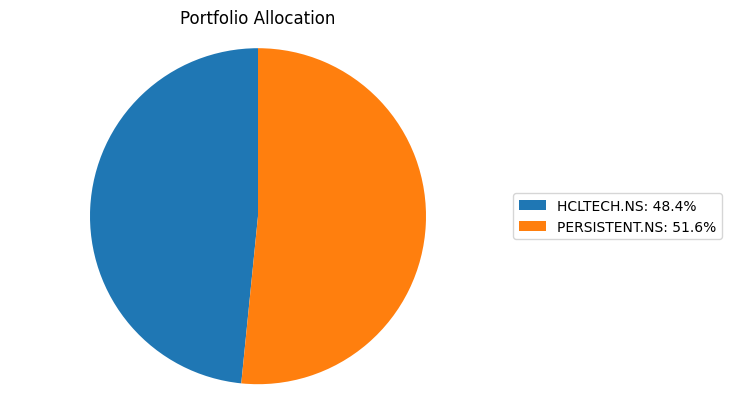

In [75]:
import matplotlib.pyplot as plt

# Extract the assets and corresponding weights from the cleaned_weights dictionary
assets = list(cleaned_weights.keys())
weights = list(cleaned_weights.values())

# Filter out labels with 0.0% weight
non_zero_assets = [asset for asset, weight in cleaned_weights.items() if weight > 0.0]
non_zero_weights = [weight for weight in cleaned_weights.values() if weight > 0.0]

# Check if there are non-zero weights
if not non_zero_weights:
    print("No assets with non-zero weights.")
else:
    # Create a pie chart
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(non_zero_weights, startangle=90)

    # Set aspect ratio to be equal so that pie is drawn as a circle
    ax.axis('equal')

    # Create a legend with custom labels using non-zero assets and weights
    legend_labels = [f'{label}: {weight:.1%}' for label, weight in zip(non_zero_assets, non_zero_weights)]
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set a title for the pie chart
    ax.set_title('Portfolio Allocation')

    # Display the pie chart
    plt.show()


[*********************100%***********************]  2 of 2 completed


Overall Percentage Change: 1.88%


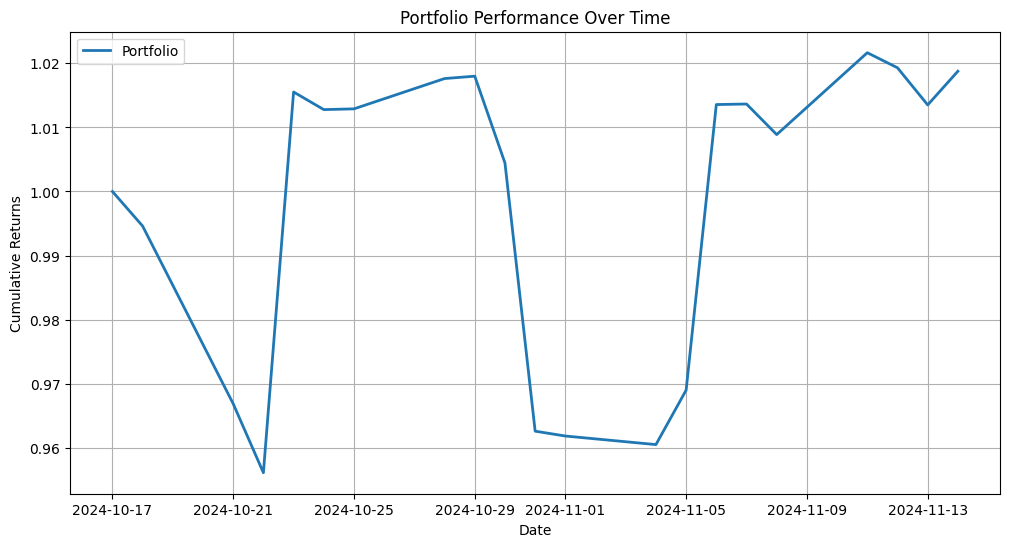

In [76]:
# Fetch historical data for each asset
data = yf.download(non_zero_assets, start=end_date, end=end_date_test)

# Calculate daily returns for each asset
daily_returns = data['Close'].pct_change()

# Convert weights to a NumPy array and calculate portfolio value over time
weights_array = np.array(non_zero_weights)
portfolio_value = np.sum(daily_returns * weights_array, axis=1)

# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_value).cumprod()
overall_percentage_change = (cumulative_returns.iloc[-1] - 1) * 100
print(f'Overall Percentage Change: {overall_percentage_change:.2f}%')


# Plot the cumulative portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, label='Portfolio', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Performance Over Time')
plt.grid(True)
plt.legend()
plt.show()

##Mean-Semivaraince Portfolio

In [77]:
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientSemivariance

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(returns, frequency=no_of_days)
S = risk_models.semicovariance(returns)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe(risk_free_rate=rfr)
# print("These are the raw weights: ", raw_weights)
cleaned_weights = ef.clean_weights()
# print("These are the cleaned weights: ", cleaned_weights)
ef.portfolio_performance(verbose=True)

Expected annual return: 2.3%
Annual volatility: 17.6%
Sharpe Ratio: 0.10


(0.022749407363152823, 0.175583287130899, 0.09736269467949345)

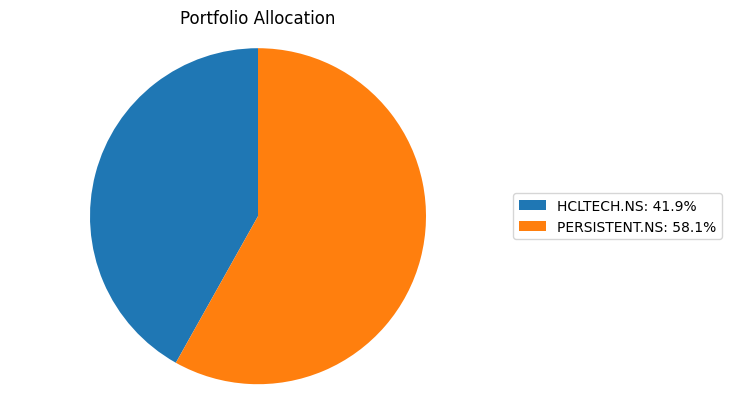

In [78]:
import matplotlib.pyplot as plt

# Extract the assets and corresponding weights from the cleaned_weights dictionary
assets = list(cleaned_weights.keys())
weights = list(cleaned_weights.values())

# Filter out labels with 0.0% weight
non_zero_assets_msv = [asset for asset, weight in cleaned_weights.items() if weight > 0.0]
non_zero_weights_msv = [weight for weight in cleaned_weights.values() if weight > 0.0]

# Check if there are non-zero weights
if not non_zero_weights_msv:
    print("No assets with non-zero weights.")
else:
    # Create a pie chart
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(non_zero_weights_msv, startangle=90)

    # Set aspect ratio to be equal so that pie is drawn as a circle
    ax.axis('equal')

    # Create a legend with custom labels using non-zero assets and weights
    legend_labels = [f'{label}: {weight:.1%}' for label, weight in zip(non_zero_assets_msv, non_zero_weights_msv)]
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set a title for the pie chart
    ax.set_title('Portfolio Allocation')

    # Display the pie chart
    plt.show()


[*********************100%***********************]  2 of 2 completed


Overall Percentage Change: 2.07%


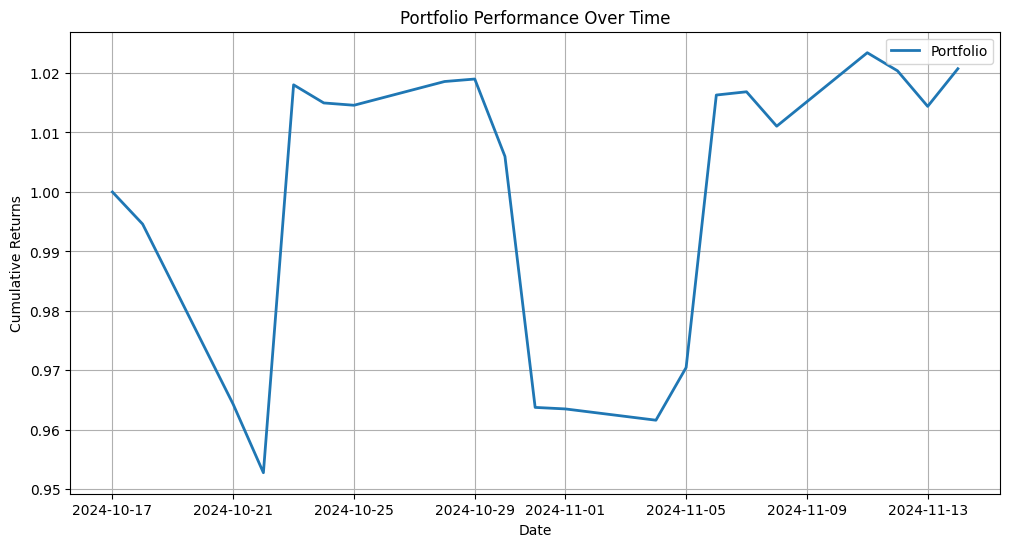

In [79]:
# Fetch historical data for each asset
data = yf.download(non_zero_assets_msv, start=end_date, end=end_date_test)

# Calculate daily returns for each asset
daily_returns = data['Close'].pct_change()

# Convert weights to a NumPy array and calculate portfolio value over time
weights_array = np.array(non_zero_weights_msv)
portfolio_value = np.sum(daily_returns * weights_array, axis=1)

# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_value).cumprod()
overall_percentage_change = (cumulative_returns.iloc[-1] - 1) * 100
print(f'Overall Percentage Change: {overall_percentage_change:.2f}%')


# Plot the cumulative portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, label='Portfolio', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Performance Over Time')
plt.grid(True)
plt.legend()
plt.show()

##Equal-weighted Portfolio

[*********************100%***********************]  3 of 3 completed


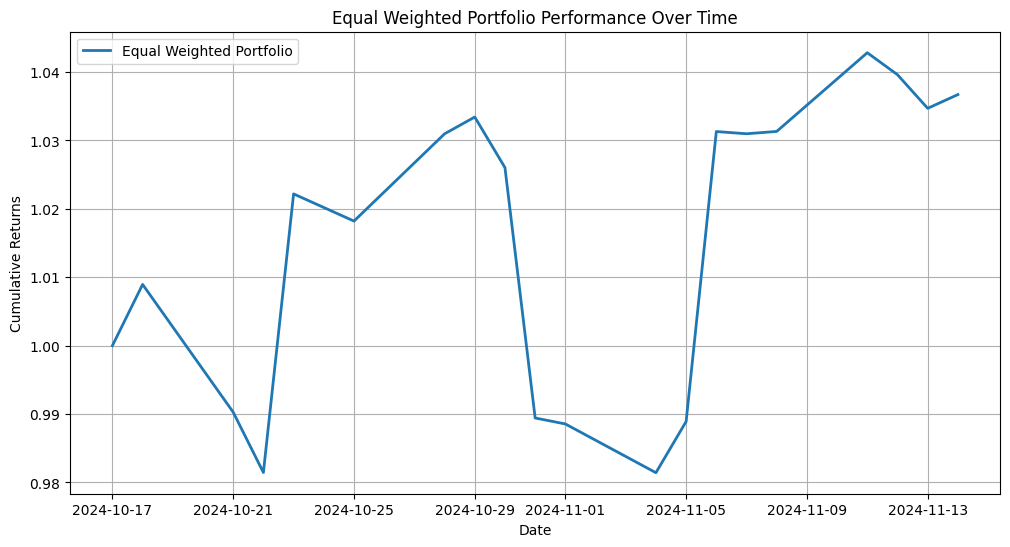

Overall Percentage Return of Equal Weighted Portfolio: 3.67%


In [80]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for each asset
data = yf.download(assets, start=end_date, end=end_date_test)

# Calculate daily returns for each asset
daily_returns = data['Close'].pct_change()

# Calculate the percentage return for an equally weighted portfolio
n_assets = len(assets)
weights = np.ones(n_assets) / n_assets
portfolio_value = np.sum(daily_returns * weights, axis=1)

# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_value).cumprod()

# Plot the cumulative portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, label='Equal Weighted Portfolio', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Equal Weighted Portfolio Performance Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Calculate and print the overall percentage return of the equal weighted portfolio
overall_percentage_return = (cumulative_returns.iloc[-1] - 1) * 100
print(f'Overall Percentage Return of Equal Weighted Portfolio: {overall_percentage_return:.2f}%')


##Max Sharpe Portfolio

In [81]:
import pandas as pd
import numpy as np
import yfinance as yf

try:

    # Define the list of stock tickers

    # Retrieve historical price data
    data = adj_close

    # Calculate stock returns for the selected tickers
    returns = data[tickers].pct_change().dropna()

    # Number of stocks
    num_stocks = len(tickers)

    # Generate random portfolio weights
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)

    # Define the risk-free rate
    risk_free_rate = rfr

    # Initialize variables for maximum Sharpe ratio calculation
    max_sharpe_ratio = float('-inf')
    optimal_weights = None

    # Calculate returns and volatility for each set of weights
    for _ in range(100000):
        weights = np.random.random(num_stocks)
        weights /= np.sum(weights)

        portfolio_return = np.dot(returns.mean().values, weights) * no_of_days
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * no_of_days, weights)))

        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_weights = weights

    portfolio_value = 100000

    # Calculate the investment amount for each stock
    investment_amounts = optimal_weights * portfolio_value

    # Retrieve current price data
    current_data = yf.download(tickers, period='1d')['Close']

    # Calculate the current value of each stock
    current_values = current_data.iloc[-1]

    # Calculate the number of stocks for each investment amount
    num_stocks = (investment_amounts // current_values)

    # Print the tickers with their investment amounts
    for i, ticker in enumerate(tickers):
        ratio = investment_amounts[i]/portfolio_value
    #     print(f'{ticker}: {ratio}')
except:
    pass

[*********************100%***********************]  3 of 3 completed


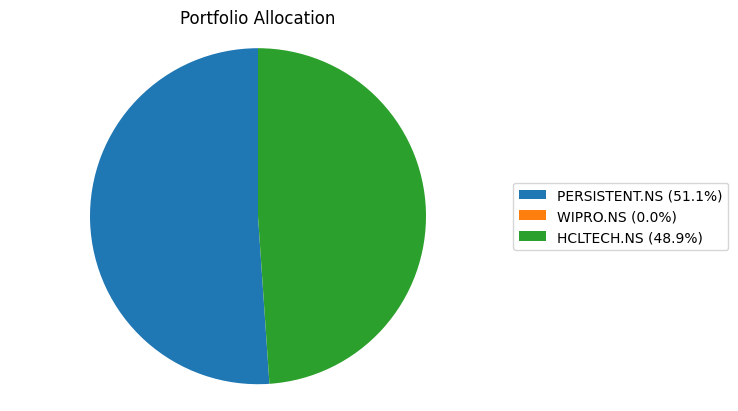

0.2877176545017173


In [82]:
import matplotlib.pyplot as plt

# Define the labels for the pie chart
labels = tickers

# Remove tickers with 0 investment amount
non_zero_investments = investment_amounts[~np.isclose(investment_amounts, 0)]
non_zero_ratios = [(ratio*100) for ratio in (investment_amounts/portfolio_value) if not np.isclose(ratio, 0)]
non_zero_labels = [f"{label} ({ratio:.1f}%)" for label, investment_amount, ratio in zip(labels, investment_amounts, non_zero_ratios) if not np.isclose(ratio, 0)]

# Create a pie chart
fig, ax = plt.subplots()
wedges, _ = ax.pie(non_zero_investments, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')

# Add labels to the pie chart
ax.legend(wedges, non_zero_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Portfolio Allocation")
plt.show()

print(max_sharpe_ratio)


In [83]:
assets = []
weights = []

# Loop through the portfolio list and extract assets and weights
for item in non_zero_labels:
    parts = item.split(' ')
    asset = parts[0]
    weight = float(parts[1][1:-2])  # Removing '%' and converting to float
    assets.append(asset)
    weights.append(weight)

print("Assets:", assets)
print("Weights:", weights)

Assets: ['PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS']
Weights: [51.1, 0.0, 48.9]


[*********************100%***********************]  3 of 3 completed

Overall Percentage Change: 3.59%


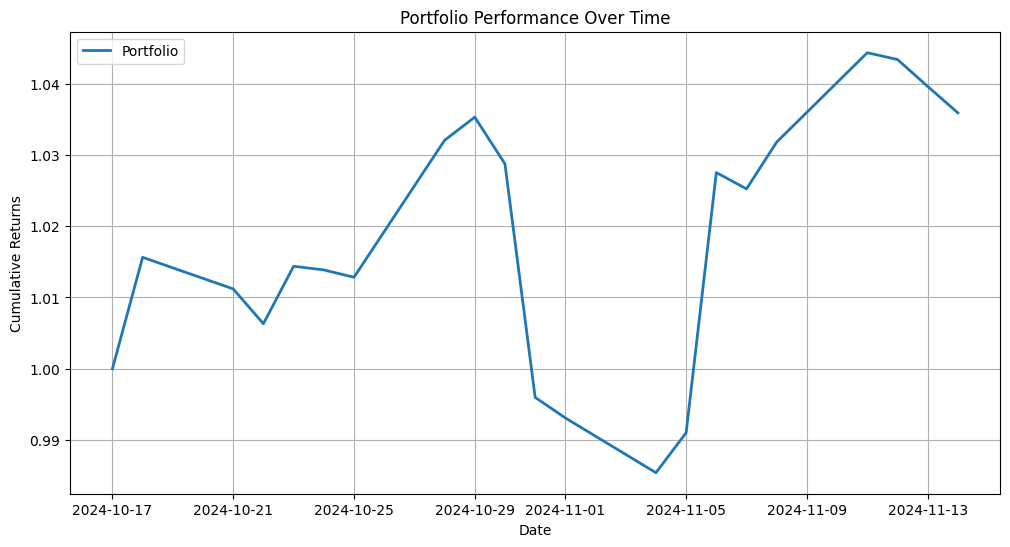

In [84]:
# Fetch historical data for each asset
data = yf.download(assets, start=end_date, end=end_date_test)

# Calculate daily returns for each asset
daily_returns = data['Close'].pct_change()

# Convert weights to a NumPy array and calculate portfolio value over time
weights_array = np.array(weights)
portfolio_value = np.sum(daily_returns * (weights_array / 100), axis=1)

# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_value).cumprod()
overall_percentage_change = (cumulative_returns.iloc[-1] - 1) * 100
print(f'Overall Percentage Change: {overall_percentage_change:.2f}%')

# Plot the cumulative portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, label='Portfolio', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Performance Over Time')
plt.grid(True)
plt.legend()
plt.show()